In [49]:
from osgeo import gdal
from osgeo import osr
import numpy as np
import matplotlib.pyplot as plt
import geopandas

In [50]:
image_data = gdal.Open('../resourses/soil_moisture.tif')

In [51]:
print(f'Розмір: {image_data.RasterYSize} рядків і {image_data.RasterXSize} стовпців')
print(f'Кількість шарів: {image_data.RasterCount}')

Розмір: 505 рядків і 777 стовпців
Кількість шарів: 1


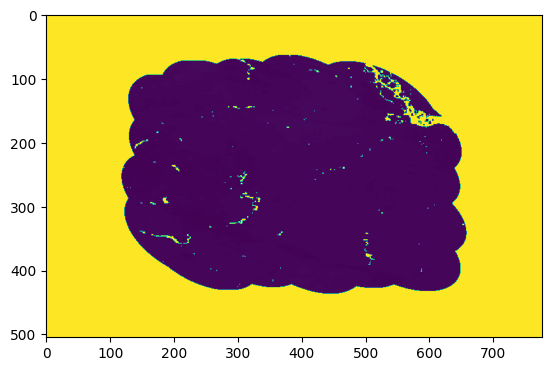

In [52]:
array = image_data.GetRasterBand(1).ReadAsArray()
plt.imshow(array)
plt.show()

In [53]:
metadata = image_data.GetMetadata()
print(metadata)

{'AREA_OR_POINT': 'Area'}


<Axes: >

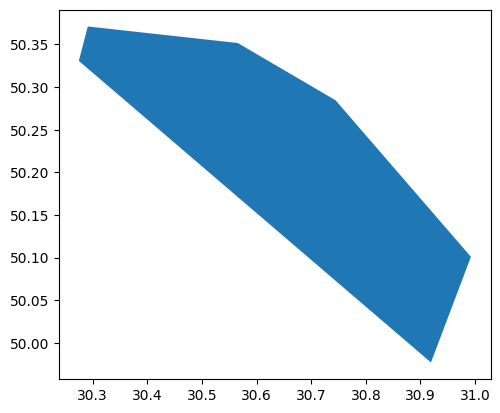

In [54]:
#Створений полігон
polygon_data = geopandas.read_file("../resourses/polygon.geojson")
polygon_data.plot()

In [55]:
image_path = '../resourses/soil_moisture.tif'
polygon_path = '../resourses/polygon.geojson'
warped_image_path = '../resourses/warped_image.tif'

gdal.Warp(warped_image_path, image_path, cutlineDSName = polygon_path, cropToCutline = True)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000002294E977C60> >

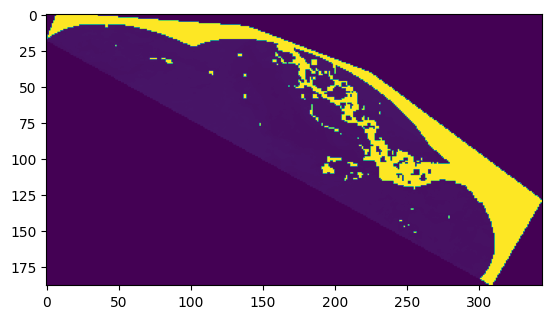

In [56]:
warped_image_data = gdal.Open(warped_image_path)

array = warped_image_data.GetRasterBand(1).ReadAsArray()
plt.imshow(array)
plt.show()

In [57]:
gdal.Translate('../resourses/warped_image.jpg', warped_image_path, format = 'JPEG')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000002294E978C60> >

In [58]:
#Цей кусок коду я фул копірнув з https://github.com/ISelF-TaughTI/Geo/blob/main/Lab_05/lab_05.ipynb
transform = image_data.GetGeoTransform()

x1 = 100
x2 = 300
y1 = 200
y2 = 400

x1 = transform[0] + x1 * transform[1]
y1 = transform[3] + y1 * transform[5]

x2 = transform[0] + x2 * transform[1]
y2 = transform[3] + y2 * transform[5]

target_epsg = osr.SpatialReference()
target_epsg.ImportFromEPSG(3857)

image_epsg = osr.SpatialReference()
image_epsg.ImportFromWkt(image_data.GetProjection())

transformation = osr.CoordinateTransformation(image_epsg, target_epsg)
point1 = transformation.TransformPoint(x1, y1)
point2 = transformation.TransformPoint(x2, y2)

print(f'Точка 1: ({point1[0]}, {point1[1]})')
print(f'Точка 2: ({point2[0]}, {point2[1]})')

Точка 1: (5573767.56837393, 3474656.5495024156)
Точка 2: (5527384.454631365, 3528206.3432640517)
